In [3]:
# EDA e Visualização de Dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna


In [4]:
df_laptop = pd.read_csv('.\dataset\dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Carolina\AppData\Local\Temp\ipykernel_17080\890834347.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_laptop = pd.read_csv('.\dataset\dataset.csv')


In [43]:
# Analisar DataFrame
df_laptop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [44]:
# Visualizar os registros
df_laptop.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,73
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,44
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,28
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,53
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,14
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,...,256,apple,apple,0,13.3,2560,1600,mac,1,113
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,...,512,intel,integrated,0,15.6,1920,1080,windows,1,4
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,19
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,95
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,83


### EDA

In [7]:
# Análise Estatistica das Variáveis
df_laptop.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


- Percebemos a possível existencia de __outliers__ em algumas variáveis, que provavelmente não são erros de digitação, os números estão dentro da realidade

In [8]:
# Checar Variável year_of_warranty
df_laptop['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [9]:
# Ajustar variável year_of_qarranty
df_laptop.loc[df_laptop['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptop['year_of_warranty'] = df_laptop['year_of_warranty'].astype(int)

In [10]:
# Ajustar variável is_touch_screen
df_laptop['is_touch_screen'] = df_laptop['is_touch_screen'].astype(int)
df_laptop['is_touch_screen'].unique()


array([0, 1])

### Análise Univariada

In [11]:
# Distribuição da variável brand
percentual_brand = df_laptop['brand'].value_counts() / len(df_laptop) * 100
px.bar(percentual_brand, color=percentual_brand.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'asus',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'asus',
              'offsetgroup': 'asus',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['asus'], dtype=object),
              'xaxis': 'x',
              'y': array([21.19071645]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'hp',
              'offsetgroup': 'hp',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['hp'], dtype=object),
              'xaxis': 'x',
              'y': array([20.68617558]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'lenovo',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'lenovo',
              'offsetgroup': 'lenovo',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['lenovo'], dtype=object),
              'xaxis': 'x',
              'y': array([20.28254289]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'dell',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'dell',
              'offsetgroup': 'dell',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['dell'], dtype=object),
              'xaxis': 'x',
              'y': array([10.6962664]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'msi',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'msi',
              'offsetgroup': 'msi',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['msi'], dtype=object),
              'xaxis': 'x',
              'y': array([9.08173562]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': 'acer',
              'offsetgroup': 'acer',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['acer'], dtype=object),
              'xaxis': 'x',
              'y': array([8.98082745]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'apple',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': 'apple',
              'offsetgroup': 'apple',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['apple'], dtype=object),
              'xaxis': 'x',
              'y': array([1.5136226]),
              

In [12]:
# Distribuição da variável processor_brand
percentual_processor_brand = df_laptop['processor_brand'].value_counts() / len(df_laptop) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'processor_brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'intel',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'intel',
              'offsetgroup': 'intel',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['intel'], dtype=object),
              'xaxis': 'x',
              'y': array([71.14026236]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'processor_brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'amd',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'amd',
              'offsetgroup': 'amd',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['amd'], dtype=object),
              'xaxis': 'x',
              'y': array([26.94248234]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'processor_brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'apple',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'apple',
              'offsetgroup': 'apple',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['apple'], dtype=object),
              'xaxis': 'x',
              'y': array([1.5136226]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'processor_brand=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'other',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'other',
              'offsetgroup': 'other',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['other'], dtype=object),
              'xaxis': 'x',
              'y': array([0.40363269]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'processor_brand'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y',
                         'categoryarray': [intel, amd, apple, other],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'processor_brand'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

<Axes: xlabel='price', ylabel='Count'>

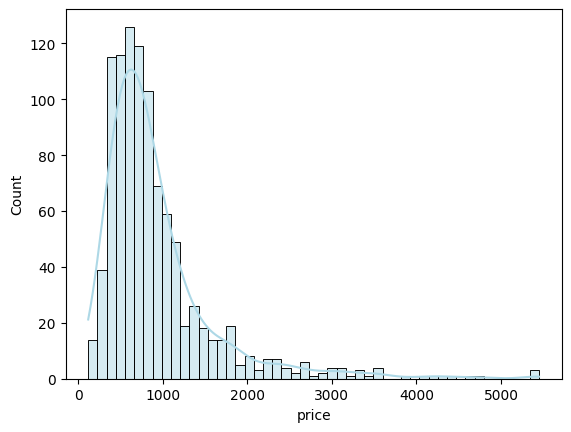

In [13]:
# Distribuição da variável price
sns.histplot(df_laptop['price'], kde=True, color='lightblue')

- Observamos uma assimetria positiva: Uma calda longa para o lado direito

<Axes: xlabel='rating', ylabel='Count'>

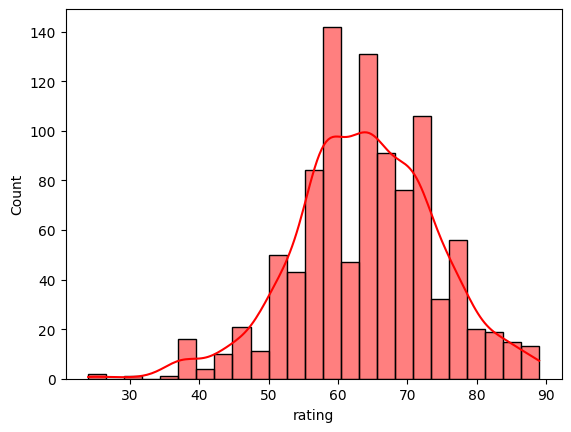

In [14]:
# Distribuição da variável rating
sns.histplot(df_laptop['rating'], kde=True, color='red')

- Observamos uma assimetria negativa próxima do normal: Uma calda para o lado esquerdo, porem não esta longa

### Análise Bivariada

In [15]:
# Plot de Distribuição (BoxPlot) por Brand e Price
px.box(df_laptop, x='price', y='brand', color='brand', orientation='h')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>price=%{x}<extra></extra>',
              'legendgroup': 'tecno',
              'marker': {'color': '#636efa'},
              'name': 'tecno',
              'notched': False,
              'offsetgroup': 'tecno',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([287.72, 431.64]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['tecno', 'tecno'], dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>price=%{x}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B'},
              'name': 'hp',
              'notched': False,
              'offsetgroup': 'hp',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([ 612.86,  443.64, 1846.86, ...,  371.78, 1858.96,  251.74], shape=(205,)),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['hp', 'hp', 'hp', ..., 'hp', 'hp', 'hp'], shape=(205,), dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>price=%{x}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#00cc96'},
              'name': 'acer',
              'notched': False,
              'offsetgroup': 'acer',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([ 479.62,  935.36,  563.57,  419.65,  395.66,  683.5 ,  455.63,  473.73,
                          1139.25,  575.56, 1439.09, 1259.19,  371.68,  467.62,  395.66,  875.4 ,
                          2158.69,  383.67,  359.68,  731.48,  683.5 , 1439.09,  335.7 ,  563.57,
                           359.68,  557.69,  599.55,  539.69,  515.7 ,  563.57,  557.57,  683.5 ,
                           477.34,  287.72,  767.57,  791.44,  599.55,  739.99,  305.71,  479.62,
                           419.65,  515.6 ,  683.5 ,  635.53,  443.64,  503.6 ,  497.61, 1918.82,
                           809.54,  431.64, 1559.02,  905.49,  503.6 ,  863.4 ,  369.28,  359.56,
                           353.69,  515.6 ,  491.61,  659.52,  394.46,  347.8 ,  479.62,  599.55,
                           698.84,  677.51,  670.43, 1719.85,  707.49, 1715.04,  479.62,  441.36,
                          1259.29, 1379.12,  539.63, 1067.29,  827.42, 2399.76,  934.17,  551.58,
                           395.66,  384.87, 2218.77, 2998.23,  335.7 ,  917.48,  359.68,  827.53,
                           905.5 ]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer'],
                         dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemp

In [16]:
# Plot de Distribuição (BoxPlot) por rating e brand
px.box(df_laptop, x='rating', y='brand', color='brand', orientation='h')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>rating=%{x}<extra></extra>',
              'legendgroup': 'tecno',
              'marker': {'color': '#636efa'},
              'name': 'tecno',
              'notched': False,
              'offsetgroup': 'tecno',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([63, 67]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['tecno', 'tecno'], dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>rating=%{x}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B'},
              'name': 'hp',
              'notched': False,
              'offsetgroup': 'hp',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([73, 60, 85, ..., 47, 73, 37], shape=(205,)),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['hp', 'hp', 'hp', ..., 'hp', 'hp', 'hp'], shape=(205,), dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>rating=%{x}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#00cc96'},
              'name': 'acer',
              'notched': False,
              'offsetgroup': 'acer',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([62, 63, 64, 60, 58, 71, 60, 62, 72, 67, 75, 70, 49, 64, 54, 64, 78, 57,
                          59, 70, 67, 75, 49, 67, 47, 64, 64, 64, 62, 63, 63, 56, 62, 38, 65, 62,
                          67, 65, 38, 58, 62, 50, 72, 70, 63, 60, 45, 79, 65, 58, 80, 59, 64, 70,
                          59, 50, 57, 50, 60, 69, 56, 53, 51, 50, 59, 52, 50, 70, 62, 78, 58, 47,
                          65, 66, 64, 65, 73, 74, 72, 59, 50, 44, 71, 77, 52, 71, 54, 71, 67]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer',
                          'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer', 'acer'],
                         dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'brand=%{y}<br>rating=%{x}<extra></extra>',
              'legendgroup': 'lenovo',
              'marker': {'color': '#ab63fa'},
              'name': 'lenovo',
              'notched': False,
              'offsetgroup': 'lenovo',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': array([62, 66, 59, ..., 50, 48, 64], shape=(201,)),
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['lenovo', 'lenovo', 'lenovo', ..., 'lenovo', 'lenovo', 'lenovo'],
                         shape=(201,), dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
  

In [17]:
# Scatterplot de price e rating
px.scatter(df_laptop, x='price', y='rating', color='brand')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'brand=tecno<br>price=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'tecno',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'tecno',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([287.72, 431.64]),
              'xaxis': 'x',
              'y': array([63, 67]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=hp<br>price=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hp',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 612.86,  443.64, 1846.86, ...,  371.78, 1858.96,  251.74], shape=(205,)),
              'xaxis': 'x',
              'y': array([73, 60, 85, ..., 47, 73, 37], shape=(205,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=acer<br>price=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'acer',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 479.62,  935.36,  563.57,  419.65,  395.66,  683.5 ,  455.63,  473.73,
                          1139.25,  575.56, 1439.09, 1259.19,  371.68,  467.62,  395.66,  875.4 ,
                          2158.69,  383.67,  359.68,  731.48,  683.5 , 1439.09,  335.7 ,  563.57,
                           359.68,  557.69,  599.55,  539.69,  515.7 ,  563.57,  557.57,  683.5 ,
                           477.34,  287.72,  767.57,  791.44,  599.55,  739.99,  305.71,  479.62,
                           419.65,  515.6 ,  683.5 ,  635.53,  443.64,  503.6 ,  497.61, 1918.82,
                           809.54,  431.64, 1559.02,  905.49,  503.6 ,  863.4 ,  369.28,  359.56,
                           353.69,  515.6 ,  491.61,  659.52,  394.46,  347.8 ,  479.62,  599.55,
                           698.84,  677.51,  670.43, 1719.85,  707.49, 1715.04,  479.62,  441.36,
                          1259.29, 1379.12,  539.63, 1067.29,  827.42, 2399.76,  934.17,  551.58,
                           395.66,  384.87, 2218.77, 2998.23,  335.7 ,  917.48,  359.68,  827.53,
                           905.5 ]),
              'xaxis': 'x',
              'y': array([62, 63, 64, 60, 58, 71, 60, 62, 72, 67, 75, 70, 49, 64, 54, 64, 78, 57,
                          59, 70, 67, 75, 49, 67, 47, 64, 64, 64, 62, 63, 63, 56, 62, 38, 65, 62,
                          67, 65, 38, 58, 62, 50, 72, 70, 63, 60, 45, 79, 65, 58, 80, 59, 64, 70,
                          59, 50, 57, 50, 60, 69, 56, 53, 51, 50, 59, 52, 50, 70, 62, 78, 58, 47,
                          65, 66, 64, 65, 73, 74, 72, 59, 50, 44, 71, 77, 52, 71, 54, 71, 67]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=lenovo<br>price=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'lenovo',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'lenovo',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([342.77, 569.57, 599.55, ..., 371.68, 386.19, 719.48], shape=(201,)),
              'xaxis': 'x',
              'y': array([62, 66, 59, ..., 50, 48, 64], shape=(201,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=apple<br>price=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'apple',
              'marker': {'color': '#FFA15A', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'apple',
              'orientation': 'v',
              'showlege

### Treinar Modelos Clustering Hierarquico

- Temos que buscar o melhor condição de tranformação das colunas para não cairmos na maldição da dimencionalidade

In [18]:
# Selecionar as colunas para clusterização
X = df_laptop.copy()

# Remover Coluna desnecessarias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [19]:
# Separando variáveis numéricas e categoricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']

In [20]:
X.head(5)

,brand,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,tecno,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,tecno,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,hp,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,acer,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,lenovo,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1


In [21]:
# Aplicar as Transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [22]:
# Criar Pre Processador das Transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [24]:
# Visualizar X_transformed
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13874 stored elements and shape (991, 54)>

- Agora temos uma Matriz numpy ao inves de array

In [26]:
def hierarchical_aglomerative_objective(trail):
    # Definindo Hiperparâmetros
    n_clusters = trail.suggest_int('n_clusters', 10, 150)
    # Linkage: Critério de distaância entre dois conjuntos para formar os clusters
    # ward = Variância
    # average = Média
    # complete = Máxima
    # single = Miníma
    linkage = trail.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])
    
    # Instanciar Modelo
    hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

    # Treinar o modelo e já executar a clusterização
    y = hierarchical_model.fit_predict(X_transformed.toarray())

    # Calcular métrica silhouette_score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [27]:
# Criando o Estudo no Optuna
search_space_ag = {'n_clusters': range(10, 151), 'linkage': ['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(sampler=sampler_ag, direction='maximize')

[I 2025-01-22 23:49:24,086] A new study created in memory with name: no-name-f7e54bbc-b729-4336-a113-9363db120a4a


In [28]:
estudo_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2025-01-22 23:49:48,723] Trial 0 finished with value: 0.2234907963314824 and parameters: {'n_clusters': 108, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-01-22 23:49:48,796] Trial 1 finished with value: 0.17524794730527618 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-01-22 23:49:48,877] Trial 2 finished with value: 0.18192511775951023 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-01-22 23:49:48,945] Trial 3 finished with value: 0.17426651499876017 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-01-22 23:49:49,024] Trial 4 finished with value: 0.22831449937222206 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.22831449937222206.
[I 2025-01-22 23:49:49,096] Trial 5 finished with value: 0.2354443546476447 and 

In [31]:
# Mostrar melhor configuração do Optuna (Aglomerative)
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag['n_clusters']}\nLinkage = {best_params_ag['linkage']}')

Clusters = 149
Linkage = ward


In [32]:
def hierarchical_divisive_objective(trail):
    n_clusters = trail.suggest_int('n_clusters', 10, 150)

    hierarchical_model = BisectingKMeans(n_clusters=n_clusters)

    y = hierarchical_model.fit_predict(X_transformed.toarray())

    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg 

In [33]:
search_space_di = {'n_clusters': range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
estudo_di = optuna.create_study(sampler=sampler_di, direction='maximize')

[I 2025-01-23 00:13:26,655] A new study created in memory with name: no-name-5c6da490-4873-4c00-a6d4-7e7433fd035c


In [34]:
estudo_di.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2025-01-23 00:15:05,019] Trial 0 finished with value: 0.17127433403983414 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,187] Trial 1 finished with value: 0.15449830728662212 and parameters: {'n_clusters': 70}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,301] Trial 2 finished with value: 0.1538113009936919 and parameters: {'n_clusters': 17}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,448] Trial 3 finished with value: 0.15406586103342082 and parameters: {'n_clusters': 61}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,605] Trial 4 finished with value: 0.14941978614084891 and parameters: {'n_clusters': 76}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,718] Trial 5 finished with value: 0.14747765492443307 and parameters: {'n_clusters': 37}. Best is trial 0 with value: 0.17127433403983414.
[I 2025-01-23 00:15:05,904] T

In [38]:
best_params_di = estudo_di.best_params
print(f'Clusters: {best_params_di['n_clusters']}')

Clusters: 150


In [39]:
# Criar Modelo com Melhor Configuração (Aglomerative)

best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)

In [40]:
# Treinar Modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [41]:
# Verificar Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

np.float64(0.32745480721431686)

In [42]:
# Criar Coluna com Cluster escolhido no DataFrame Original
df_laptop['cluster'] = best_model.labels_

### Visualizar os Resultados

In [46]:
# Mostrar Chart com Trails do Optuna
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 561, 562, 563],
              'y': [0.2234907963314824, 0.17524794730527618, 0.18192511775951023,
                    ..., 0.21041782467273695, 0.20416843219378486,
                    0.058874925545870545]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 561, 562, 563],
              'y': [0.2234907963314824, 0.2234907963314824, 0.2234907963314824,
                    ..., 0.32745480721431686, 0.32745480721431686,
                    0.32745480721431686]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [47]:
# Treinar modelo com Scipy
model_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

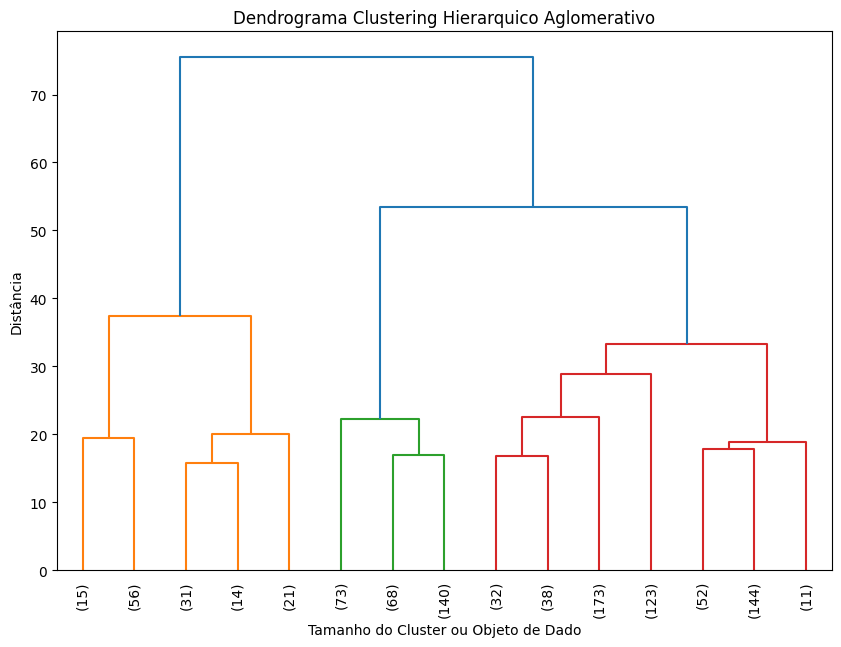

In [49]:
# Mostrando Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(model_de, truncate_mode='lastp', p=15, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dado')
plt.ylabel('Distância')
plt.show()

In [51]:
# Cortar Dendrograma
clusters_de_scipy = cut_tree(model_de, height=32)
print(f' Foi feito um corte de {len(np.unique(clusters_de_scipy))} Ramos')

 Foi feito um corte de 5 Ramos


In [52]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptop, x='brand', y='price', color='cluster')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'brand=%{x}<br>price=%{y}<br>cluster=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 73,  44,  28, ...,  64, 115,  36], shape=(991,)),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['tecno', 'tecno', 'hp', ..., 'asus', 'asus', 'hp'],
                         shape=(991,), dtype=object),
              'xaxis': 'x',
              'y': array([287.72, 431.64, 612.86, ..., 539.58, 815.43, 251.74], shape=(991,)),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'cluster'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'brand'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})

In [53]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptop, x='cluster', y='price', color='brand')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'brand=tecno<br>cluster=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': 'tecno',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'tecno',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([73, 44]),
              'xaxis': 'x',
              'y': array([287.72, 431.64]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=hp<br>cluster=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hp',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([28, 95, 24, ..., 45, 58, 36], shape=(205,)),
              'xaxis': 'x',
              'y': array([ 612.86,  443.64, 1846.86, ...,  371.78, 1858.96,  251.74], shape=(205,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=acer<br>cluster=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'acer',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 53,  47,  25,   4,  49,  47, 147,  49,  47, 130,  30,  30, 137,  46,
                          136,  13, 104,  49,  89,  47,  97,  10, 137,  33, 137,  44,  46,  33,
                           33,  33,  44,  53, 116, 120,  47, 130,  44,  47,  36,   4,   4, 137,
                           47, 130, 106, 106,  56,  78, 130, 136,  32, 130,   4,  47,  49, 137,
                          136, 137,  46,  47, 106, 106, 137,  46,  53, 107,  33,  59,  18,  27,
                           89, 105,  59,  59, 130,  17,  32,  55,  32, 130, 137,  56,  78,  29,
                          136,  47, 136,  11,  11]),
              'xaxis': 'x',
              'y': array([ 479.62,  935.36,  563.57,  419.65,  395.66,  683.5 ,  455.63,  473.73,
                          1139.25,  575.56, 1439.09, 1259.19,  371.68,  467.62,  395.66,  875.4 ,
                          2158.69,  383.67,  359.68,  731.48,  683.5 , 1439.09,  335.7 ,  563.57,
                           359.68,  557.69,  599.55,  539.69,  515.7 ,  563.57,  557.57,  683.5 ,
                           477.34,  287.72,  767.57,  791.44,  599.55,  739.99,  305.71,  479.62,
                           419.65,  515.6 ,  683.5 ,  635.53,  443.64,  503.6 ,  497.61, 1918.82,
                           809.54,  431.64, 1559.02,  905.49,  503.6 ,  863.4 ,  369.28,  359.56,
                           353.69,  515.6 ,  491.61,  659.52,  394.46,  347.8 ,  479.62,  599.55,
                           698.84,  677.51,  670.43, 1719.85,  707.49, 1715.04,  479.62,  441.36,
                          1259.29, 1379.12,  539.63, 1067.29,  827.42, 2399.76,  934.17,  551.58,
                           395.66,  384.87, 2218.77, 2998.23,  335.7 ,  917.48,  359.68,  827.53,
                           905.5 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=lenovo<br>cluster=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': 'lenovo',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'lenovo',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 14,   4, 107, ...,  67,  75,  25], shape=(201,)),
              'xaxis': 'x',
              'y': array([342.77, 569.57, 599.55, ..., 371.68, 386.19, 719.48], shape=(201,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=apple<br>cluster=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': 'apple',
              'marker': {'color': '

In [54]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptop, x='brand', y='rating', color='cluster')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'brand=%{x}<br>rating=%{y}<br>cluster=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 73,  44,  28, ...,  64, 115,  36], shape=(991,)),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['tecno', 'tecno', 'hp', ..., 'asus', 'asus', 'hp'],
                         shape=(991,), dtype=object),
              'xaxis': 'x',
              'y': array([63, 67, 73, ..., 59, 68, 37], shape=(991,)),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'cluster'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'brand'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'rating'}}}
})

In [55]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptop, x='cluster', y='rating', color='brand')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'brand=tecno<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'tecno',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'tecno',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([73, 44]),
              'xaxis': 'x',
              'y': array([63, 67]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=hp<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'hp',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'hp',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([28, 95, 24, ..., 45, 58, 36], shape=(205,)),
              'xaxis': 'x',
              'y': array([73, 60, 85, ..., 47, 73, 37], shape=(205,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=acer<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'acer',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'acer',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 53,  47,  25,   4,  49,  47, 147,  49,  47, 130,  30,  30, 137,  46,
                          136,  13, 104,  49,  89,  47,  97,  10, 137,  33, 137,  44,  46,  33,
                           33,  33,  44,  53, 116, 120,  47, 130,  44,  47,  36,   4,   4, 137,
                           47, 130, 106, 106,  56,  78, 130, 136,  32, 130,   4,  47,  49, 137,
                          136, 137,  46,  47, 106, 106, 137,  46,  53, 107,  33,  59,  18,  27,
                           89, 105,  59,  59, 130,  17,  32,  55,  32, 130, 137,  56,  78,  29,
                          136,  47, 136,  11,  11]),
              'xaxis': 'x',
              'y': array([62, 63, 64, 60, 58, 71, 60, 62, 72, 67, 75, 70, 49, 64, 54, 64, 78, 57,
                          59, 70, 67, 75, 49, 67, 47, 64, 64, 64, 62, 63, 63, 56, 62, 38, 65, 62,
                          67, 65, 38, 58, 62, 50, 72, 70, 63, 60, 45, 79, 65, 58, 80, 59, 64, 70,
                          59, 50, 57, 50, 60, 69, 56, 53, 51, 50, 59, 52, 50, 70, 62, 78, 58, 47,
                          65, 66, 64, 65, 73, 74, 72, 59, 50, 44, 71, 77, 52, 71, 54, 71, 67]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=lenovo<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'lenovo',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'lenovo',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 14,   4, 107, ...,  67,  75,  25], shape=(201,)),
              'xaxis': 'x',
              'y': array([62, 66, 59, ..., 50, 48, 64], shape=(201,)),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=apple<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'apple',
              'marker': {'color': '#FFA15A', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'apple',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([113, 142, 113,  88, 113, 101, 101, 103,  88,  88, 113, 113, 119, 119,
                           88]),
              'xaxis': 'x',
              'y': array([45, 65, 48, 53, 43, 63, 64, 58, 56, 56, 45, 45, 53, 58, 51]),
              'yaxis': 'y'},
             {'hovertemplate': 'brand=infinix<br>cluster=%{x}<br>rating=%{y}<extra></extra>',
              'legendgroup': 'infinix',
              'marker': {'color': '#19d3f3', 'symbol': 'circle'},
              

In [59]:
percentual_cluster = df_laptop.value_counts('cluster') / len(df_laptop) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'cluster=%{marker.color}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 14,   3,  31,   4,  21,   7,   9,  15,  11,  38,  46,  19,  13,  84,
                                         107,  82,  27,   0,   5,  91,  85,  50,  53,  89,  51,  62,  47,  48,
                                          25,  93,  10,  20,  73,  28,  56,  30,  32, 147, 114,  95,  57,  37,
                                          49,  29,  17,  94, 137, 102,  65, 111,  18,   2, 148,  74, 135, 121,
                                          64,  16, 130,  23,  33,  72,  80,  66, 139,  39,  78,  75,  67, 132,
                                         146,  41,   8,  96,  90, 136,  69,  43,  42,  36,  52,  44,  55,  59,
                                          35,  97, 122, 105, 113,  70,  61,   1,  54, 129, 128, 116, 124, 127,
                                          88,  63,  76, 106,  86,   6,  12,  71,  58, 134,  87,  40,  34,  26,
                                          24,  45,  68,  60,  79,  92, 123, 115, 109, 112,  99, 110,  22, 119,
                                          83,  77, 133, 101, 104, 126, 140, 131,  81,  98, 100, 103, 108, 117,
                                         118, 125, 120, 138, 141, 144, 143, 142, 145]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 14,   3,  31,   4,  21,   7,   9,  15,  11,  38,  46,  19,  13,  84,
                          107,  82,  27,   0,   5,  91,  85,  50,  53,  89,  51,  62,  47,  48,
                           25,  93,  10,  20,  73,  28,  56,  30,  32, 147, 114,  95,  57,  37,
                           49,  29,  17,  94, 137, 102,  65, 111,  18,   2, 148,  74, 135, 121,
                           64,  16, 130,  23,  33,  72,  80,  66, 139,  39,  78,  75,  67, 132,
                          146,  41,   8,  96,  90, 136,  69,  43,  42,  36,  52,  44,  55,  59,
                           35,  97, 122, 105, 113,  70,  61,   1,  54, 129, 128, 116, 124, 127,
                           88,  63,  76, 106,  86,   6,  12,  71,  58, 134,  87,  40,  34,  26,
                           24,  45,  68,  60,  79,  92, 123, 115, 109, 112,  99, 110,  22, 119,
                           83,  77, 133, 101, 104, 126, 140, 131,  81,  98, 100, 103, 108, 117,
                          118, 125, 120, 138, 141, 144, 143, 142, 145]),
              'xaxis': 'x',
              'y': array([2.21997982, 2.11907164, 2.01816347, 1.9172553 , 1.61453078, 1.5136226 ,
                          1.5136226 , 1.41271443, 1.41271443, 1.41271443, 1.41271443, 1.31180626,
                          1.31180626, 1.31180626, 1.31180626, 1.31180626, 1.21089808, 1.21089808,
                          1.21089808, 1.21089808, 1.21089808, 1.21089808, 1.10998991, 1.10998991,
                          1.10998991, 1.10998991, 1.10998991, 1.10998991, 1.10998991, 1.10998991,
                          1.10998991, 1.00908174, 1.00908174, 1.00908174, 1.00908174, 1.00908174,
                          1.00908174, 1.00908174, 1.00908174, 1.00908174, 0.90817356, 0.90817356,
                          0.90817356, 0.90817356, 0.90817356, 0.90817356, 0.90817356, 0.90817356,
                          0.80726539, 0.80726539, 0.80726539, 0.80726539, 0.80726539, 0.80726539,
                          0.80726539, 0.80726539, 0.80726539, 0.70635721, 0.70635721, 0.70635721,
                          0.70635721, 0.70635721, 0.70635721, 0.70635721, 0.70635721, 0.60544904,
                          0.60544904, 0.60544904, 0.60544904, 0.60544904, 0.60544904, 0.60544904,
                          0.50454087, 0.50454087, 0.50454087, 0.50454087, 0.50454087, 0.50454087,


In [60]:
qtde_cluster = df_laptop.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'cluster=%{marker.color}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 14,   3,  31,   4,  21,   7,   9,  15,  11,  38,  46,  19,  13,  84,
                                         107,  82,  27,   0,   5,  91,  85,  50,  53,  89,  51,  62,  47,  48,
                                          25,  93,  10,  20,  73,  28,  56,  30,  32, 147, 114,  95,  57,  37,
                                          49,  29,  17,  94, 137, 102,  65, 111,  18,   2, 148,  74, 135, 121,
                                          64,  16, 130,  23,  33,  72,  80,  66, 139,  39,  78,  75,  67, 132,
                                         146,  41,   8,  96,  90, 136,  69,  43,  42,  36,  52,  44,  55,  59,
                                          35,  97, 122, 105, 113,  70,  61,   1,  54, 129, 128, 116, 124, 127,
                                          88,  63,  76, 106,  86,   6,  12,  71,  58, 134,  87,  40,  34,  26,
                                          24,  45,  68,  60,  79,  92, 123, 115, 109, 112,  99, 110,  22, 119,
                                          83,  77, 133, 101, 104, 126, 140, 131,  81,  98, 100, 103, 108, 117,
                                         118, 125, 120, 138, 141, 144, 143, 142, 145]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 14,   3,  31,   4,  21,   7,   9,  15,  11,  38,  46,  19,  13,  84,
                          107,  82,  27,   0,   5,  91,  85,  50,  53,  89,  51,  62,  47,  48,
                           25,  93,  10,  20,  73,  28,  56,  30,  32, 147, 114,  95,  57,  37,
                           49,  29,  17,  94, 137, 102,  65, 111,  18,   2, 148,  74, 135, 121,
                           64,  16, 130,  23,  33,  72,  80,  66, 139,  39,  78,  75,  67, 132,
                          146,  41,   8,  96,  90, 136,  69,  43,  42,  36,  52,  44,  55,  59,
                           35,  97, 122, 105, 113,  70,  61,   1,  54, 129, 128, 116, 124, 127,
                           88,  63,  76, 106,  86,   6,  12,  71,  58, 134,  87,  40,  34,  26,
                           24,  45,  68,  60,  79,  92, 123, 115, 109, 112,  99, 110,  22, 119,
                           83,  77, 133, 101, 104, 126, 140, 131,  81,  98, 100, 103, 108, 117,
                          118, 125, 120, 138, 141, 144, 143, 142, 145]),
              'xaxis': 'x',
              'y': array([22, 21, 20, 19, 16, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12,
                          12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10,
                          10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,
                           8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,
                           5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,
                           4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,
                           3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,
                           2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
                           1,  1,  1,  1,  1]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'cluster'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.44444